# Laboratorio 3

#### Mario de León
#### Javier Valle

#### Import necesarios

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time
import matplotlib.pyplot as plt

## Usando Feed Forward NN (Red simple)

In [2]:
# Cargar el dataset
data = pd.read_csv('data.csv') 


# Separando un poco el formato.
data['Year'] = data['Month'].apply(lambda x: int(x.split('-')[0]))
data['Month'] = data['Month'].apply(lambda x: int(x.split('-')[1]))

# Dividir los datos en características (X) y etiquetas (y)
X = data[['Year', 'Month']]
y = data['Sunspots']

# Conjunto de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalando los datos.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creando la estructura.
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),  # 2 características de entrada (Year, Month)
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(32, activation='relu'),  
    tf.keras.layers.Dense(16, activation='relu'),  
    tf.keras.layers.Dense(8, activation='relu'),  
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida para la regresión
])

# Compilando el modelo.
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenando el modelo
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluando el modelo.
loss = model.evaluate(X_test_scaled, y_test)
print("Pérdida en el conjunto de prueba:", loss)

# Realiznado predicciones.
predictions1 = model.predict(X_test_scaled)

Epoch 1/100
71/71 [==============================] - 1s 3ms/step - loss: 3902.7583 - val_loss: 1924.3744
Epoch 2/100
71/71 [==============================] - 0s 1ms/step - loss: 1822.8245 - val_loss: 1784.9814
Epoch 3/100
71/71 [==============================] - 0s 1ms/step - loss: 1812.3949 - val_loss: 1781.7007
Epoch 4/100
71/71 [==============================] - 0s 1ms/step - loss: 1773.6533 - val_loss: 1763.5435
Epoch 5/100
71/71 [==============================] - 0s 1ms/step - loss: 1778.5387 - val_loss: 1751.8228
Epoch 6/100
71/71 [==============================] - 0s 1ms/step - loss: 1765.4254 - val_loss: 1750.3103
Epoch 7/100
71/71 [==============================] - 0s 1ms/step - loss: 1765.7793 - val_loss: 1753.5211
Epoch 8/100
71/71 [==============================] - 0s 1ms/step - loss: 1760.0306 - val_loss: 1749.4272
Epoch 9/100
71/71 [==============================] - 0s 1ms/step - loss: 1754.0549 - val_loss: 1740.8528
Epoch 10/100
71/71 [==============================] - 0

71/71 [==============================] - 0s 1ms/step - loss: 1674.6874 - val_loss: 1736.6182
Epoch 79/100
71/71 [==============================] - 0s 1ms/step - loss: 1678.9712 - val_loss: 1734.8148
Epoch 80/100
71/71 [==============================] - 0s 1ms/step - loss: 1678.0808 - val_loss: 1745.0929
Epoch 81/100
71/71 [==============================] - 0s 1ms/step - loss: 1677.9081 - val_loss: 1738.8094
Epoch 82/100
71/71 [==============================] - 0s 1ms/step - loss: 1671.2181 - val_loss: 1740.8816
Epoch 83/100
71/71 [==============================] - 0s 1ms/step - loss: 1672.0740 - val_loss: 1736.1693
Epoch 84/100
71/71 [==============================] - 0s 1ms/step - loss: 1687.1901 - val_loss: 1749.4326
Epoch 85/100
71/71 [==============================] - 0s 1ms/step - loss: 1664.1042 - val_loss: 1739.7841
Epoch 86/100
71/71 [==============================] - 0s 1ms/step - loss: 1669.8549 - val_loss: 1727.5088
Epoch 87/100
71/71 [==============================] - 0s 1m

##### Predicciones del modelo.

In [3]:
print("Predicciones: ", predictions1)

Predicciones:  [[51.063797]
 [60.37755 ]
 [37.561375]
 [53.755863]
 [83.818375]
 [54.225895]
 [37.423016]
 [88.6388  ]
 [57.583393]
 [36.758915]
 [48.796047]
 [40.303883]
 [44.79018 ]
 [48.945007]
 [37.772755]
 [56.467228]
 [82.562004]
 [68.51408 ]
 [57.247974]
 [44.532326]
 [81.60732 ]
 [42.84301 ]
 [54.617496]
 [36.5093  ]
 [31.290146]
 [55.12729 ]
 [31.684664]
 [58.229267]
 [56.9161  ]
 [37.703888]
 [55.23125 ]
 [39.897114]
 [54.66707 ]
 [35.05203 ]
 [40.338898]
 [35.50132 ]
 [38.33304 ]
 [51.167343]
 [52.980396]
 [43.520687]
 [58.238075]
 [58.998013]
 [79.480705]
 [60.550396]
 [47.92404 ]
 [57.93355 ]
 [52.313362]
 [28.889244]
 [35.028214]
 [59.10004 ]
 [43.932705]
 [46.507793]
 [58.32176 ]
 [56.12687 ]
 [84.66025 ]
 [34.247215]
 [35.866264]
 [39.695824]
 [87.99817 ]
 [66.744965]
 [54.301537]
 [51.62448 ]
 [64.21613 ]
 [48.01364 ]
 [85.30609 ]
 [53.921337]
 [87.19667 ]
 [72.70839 ]
 [33.087723]
 [44.367092]
 [43.624146]
 [39.71181 ]
 [47.83617 ]
 [43.57285 ]
 [46.317482]
 [36.48482

In [4]:
# Calcula el MSE
mse = mean_squared_error(y_test, predictions1)
print(f"MSE: {mse}")

# Calcula el RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Calcula el MAE
mae = mean_absolute_error(y_test, predictions1)
print(f"MAE: {mae}")

MSE: 1740.027316367778
RMSE: 41.71363465784033
MAE: 33.78837564346638


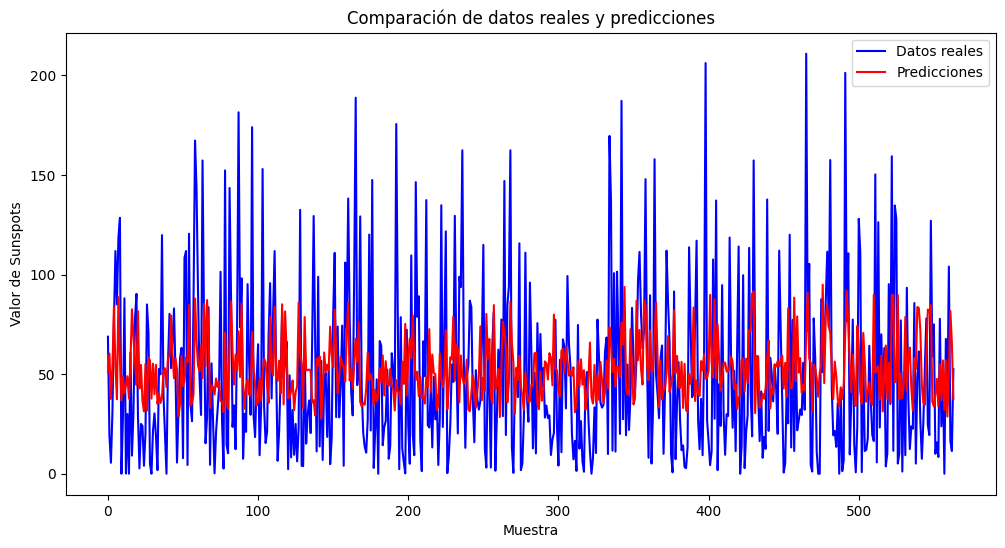

In [5]:
plt.figure(figsize=(12, 6))

# Datos reales
plt.plot(y_test.reset_index(drop=True), label="Datos reales", color="blue")

# Predicciones del modelo
plt.plot(predictions1.flatten(), label="Predicciones", color="red")

plt.title("Comparación de datos reales y predicciones")
plt.xlabel("Muestra")
plt.ylabel("Valor de Sunspots")
plt.legend()
plt.show()

Epoch 1/100
71/71 [==============================] - 0s 2ms/step - loss: 1650.1298 - val_loss: 1724.3470
Epoch 2/100
71/71 [==============================] - 0s 1ms/step - loss: 1662.8065 - val_loss: 1730.1188
Epoch 3/100
71/71 [==============================] - 0s 1ms/step - loss: 1643.3278 - val_loss: 1831.4425
Epoch 4/100
71/71 [==============================] - 0s 1ms/step - loss: 1660.8419 - val_loss: 1739.6499
Epoch 5/100
71/71 [==============================] - 0s 1ms/step - loss: 1640.5277 - val_loss: 1747.2515
Epoch 6/100
71/71 [==============================] - 0s 1ms/step - loss: 1654.6780 - val_loss: 1730.5751
Epoch 7/100
71/71 [==============================] - 0s 1ms/step - loss: 1641.9030 - val_loss: 1746.6674
Epoch 8/100
71/71 [==============================] - 0s 1ms/step - loss: 1643.7816 - val_loss: 1746.2310
Epoch 9/100
71/71 [==============================] - 0s 1ms/step - loss: 1647.5967 - val_loss: 1747.3231
Epoch 10/100
71/71 [==============================] - 0

71/71 [==============================] - 0s 1ms/step - loss: 1605.1367 - val_loss: 1714.9790
Epoch 79/100
71/71 [==============================] - 0s 1ms/step - loss: 1626.4021 - val_loss: 1716.6736
Epoch 80/100
71/71 [==============================] - 0s 1ms/step - loss: 1607.1935 - val_loss: 1716.9386
Epoch 81/100
71/71 [==============================] - 0s 1ms/step - loss: 1610.7286 - val_loss: 1772.7051
Epoch 82/100
71/71 [==============================] - 0s 1ms/step - loss: 1606.4082 - val_loss: 1707.2423
Epoch 83/100
71/71 [==============================] - 0s 1ms/step - loss: 1609.0215 - val_loss: 1718.4128
Epoch 84/100
71/71 [==============================] - 0s 1ms/step - loss: 1607.9781 - val_loss: 1737.8499
Epoch 85/100
71/71 [==============================] - 0s 1ms/step - loss: 1608.0264 - val_loss: 1735.9344
Epoch 86/100
71/71 [==============================] - 0s 1ms/step - loss: 1596.1105 - val_loss: 1707.2874
Epoch 87/100
71/71 [==============================] - 0s 1m

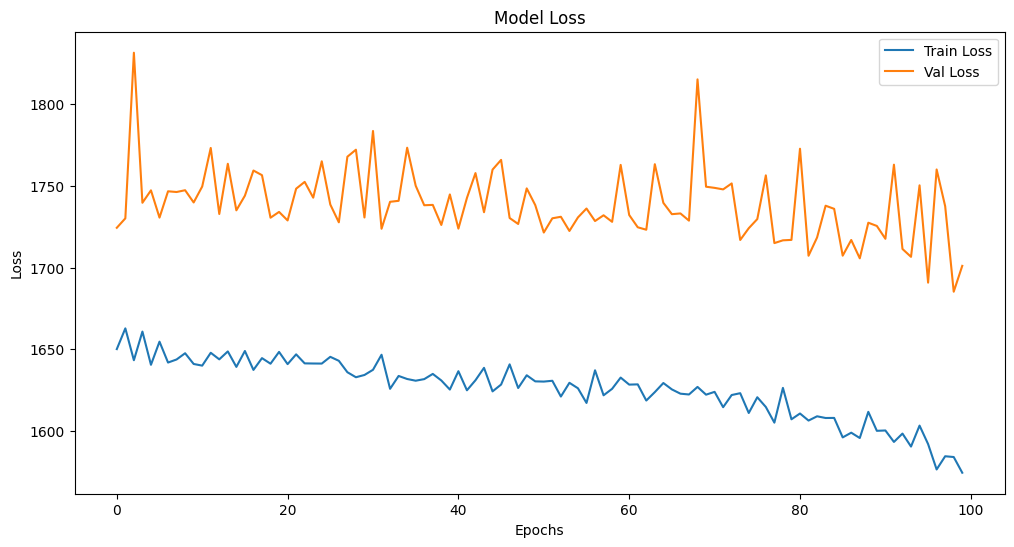

In [6]:
# Usa el objeto 'history' que devuelve la función 'fit' para guardar la historia de entrenamiento
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Gráfica las curvas de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Usando RNN

In [7]:
# Cargar el conjunto de datos
data = pd.read_csv('data.csv')  

# Cambio de formato
data['Year'] = data['Month'].apply(lambda x: int(x.split('-')[0]))
data['Month'] = data['Month'].apply(lambda x: int(x.split('-')[1]))

# Preparar los datos
# Usando la secuencia como la cantidad de meses.
sequence_length = 12
input_data = []
target_data = []
for i in range(len(data) - sequence_length):
    input_sequence = data[['Year', 'Month', 'Sunspots']].iloc[i : i + sequence_length].values
    target_value = data['Sunspots'].iloc[i + sequence_length]
    input_data.append(input_sequence)
    target_data.append(target_value)

input_data = np.array(input_data)
target_data = np.array(target_data)

# Dividiendo el conjunto de datos en entrenamiento y prueba.
train_size = int(0.8 * len(input_data))
X_train, X_test = input_data[:train_size], input_data[train_size:]
y_train, y_test = target_data[:train_size], target_data[train_size:]

# Creando la estructura de la RNN
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(sequence_length, 3)),  # Entrada con 3 características (Year, Month, Sunspots)
    tf.keras.layers.SimpleRNN(64, activation='relu', return_sequences=True),
    tf.keras.layers.SimpleRNN(64, activation='relu', return_sequences=True),
    tf.keras.layers.SimpleRNN(32, activation='relu', return_sequences=True),
    tf.keras.layers.Flatten(),  # Aplananando las secuencias para la capa densa
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida para la regresión
])

# Compilando el modelo.
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenando el modelo.
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluando el modelo.
loss = model.evaluate(X_test, y_test)
print("Pérdida en el conjunto de prueba:", loss)

Epoch 1/100
71/71 [==============================] - 2s 7ms/step - loss: 3583.4834 - val_loss: 883.6650
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 404.9727 - val_loss: 618.7126
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 398.3126 - val_loss: 594.4595
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 376.0938 - val_loss: 778.6320
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 388.2871 - val_loss: 720.6840
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 344.6135 - val_loss: 572.9035
Epoch 7/100
71/71 [==============================] - 0s 4ms/step - loss: 307.6293 - val_loss: 500.8430
Epoch 8/100
71/71 [==============================] - 0s 4ms/step - loss: 321.8528 - val_loss: 635.3153
Epoch 9/100
71/71 [==============================] - 0s 4ms/step - loss: 338.0683 - val_loss: 530.1789
Epoch 10/100
71/71 [==============================] - 0s 4ms/step - loss

Epoch 80/100
71/71 [==============================] - 0s 4ms/step - loss: 233.9438 - val_loss: 412.0964
Epoch 81/100
71/71 [==============================] - 0s 4ms/step - loss: 227.6697 - val_loss: 419.0733
Epoch 82/100
71/71 [==============================] - 0s 4ms/step - loss: 239.4275 - val_loss: 363.6234
Epoch 83/100
71/71 [==============================] - 0s 4ms/step - loss: 240.3036 - val_loss: 421.9638
Epoch 84/100
71/71 [==============================] - 0s 4ms/step - loss: 246.3937 - val_loss: 383.5244
Epoch 85/100
71/71 [==============================] - 0s 4ms/step - loss: 234.0988 - val_loss: 383.5645
Epoch 86/100
71/71 [==============================] - 0s 4ms/step - loss: 232.8764 - val_loss: 374.4026
Epoch 87/100
71/71 [==============================] - 0s 4ms/step - loss: 234.8607 - val_loss: 516.4918
Epoch 88/100
71/71 [==============================] - 0s 4ms/step - loss: 236.7049 - val_loss: 359.4863
Epoch 89/100
71/71 [==============================] - 0s 4ms/ste

##### Resumen del modelo

In [8]:
# Resumen del modelo para verificar la arquitectura
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 12, 64)            4352      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 12, 64)            8256      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 12, 32)            3104      
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                12320     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 28,065
Trainable params: 28,065
Non-trai

In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Realizando predicciones.
y_pred = model.predict(X_test)

# Calculando el MSE (Error Cuadrático Medio)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculando el RMSE (Raíz del Error Cuadrático Medio)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculando el MAE (Error Absoluto Medio)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


18/18 [==============================] - 0s 1ms/step
MSE: 401.7293626610738
RMSE: 20.04318743765756
MAE: 14.561252346581837


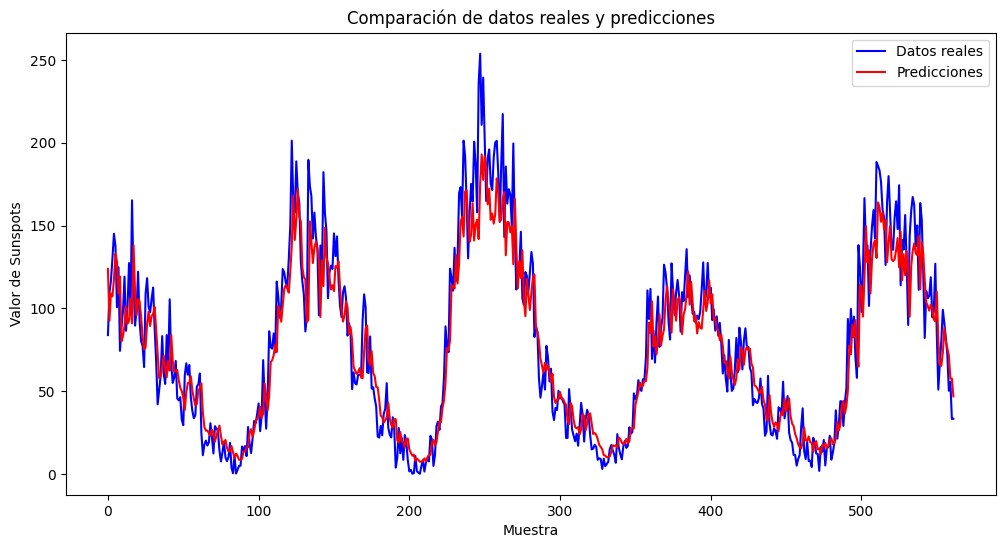

In [10]:
plt.figure(figsize=(12, 6))

# Datos reales
plt.plot(y_test, label="Datos reales", color="blue")

# Predicciones del modelo
plt.plot(y_pred.flatten(), label="Predicciones", color="red")

plt.title("Comparación de datos reales y predicciones")
plt.xlabel("Muestra")
plt.ylabel("Valor de Sunspots")
plt.legend()
plt.show()


Epoch 1/100
71/71 [==============================] - 0s 4ms/step - loss: 237.2215 - val_loss: 506.7563
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 234.2758 - val_loss: 352.0598
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 229.5311 - val_loss: 356.9084
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 258.0109 - val_loss: 362.7291
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 230.6801 - val_loss: 381.1129
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 224.4010 - val_loss: 371.9395
Epoch 7/100
71/71 [==============================] - 0s 4ms/step - loss: 216.8671 - val_loss: 369.0108
Epoch 8/100
71/71 [==============================] - 0s 4ms/step - loss: 217.2705 - val_loss: 383.5873
Epoch 9/100
71/71 [==============================] - 0s 4ms/step - loss: 239.7642 - val_loss: 372.5211
Epoch 10/100
71/71 [==============================] - 0s 4ms/step - loss:

Epoch 80/100
71/71 [==============================] - 0s 4ms/step - loss: 198.3396 - val_loss: 377.4572
Epoch 81/100
71/71 [==============================] - 0s 4ms/step - loss: 196.4765 - val_loss: 523.4084
Epoch 82/100
71/71 [==============================] - 0s 4ms/step - loss: 219.0411 - val_loss: 395.5874
Epoch 83/100
71/71 [==============================] - 0s 4ms/step - loss: 193.0635 - val_loss: 415.9774
Epoch 84/100
71/71 [==============================] - 0s 4ms/step - loss: 207.3372 - val_loss: 517.1816
Epoch 85/100
71/71 [==============================] - 0s 4ms/step - loss: 235.6598 - val_loss: 408.8030
Epoch 86/100
71/71 [==============================] - 0s 4ms/step - loss: 205.3744 - val_loss: 434.4735
Epoch 87/100
71/71 [==============================] - 0s 4ms/step - loss: 191.1540 - val_loss: 455.1571
Epoch 88/100
71/71 [==============================] - 0s 4ms/step - loss: 194.2304 - val_loss: 408.9869
Epoch 89/100
71/71 [==============================] - 0s 4ms/ste

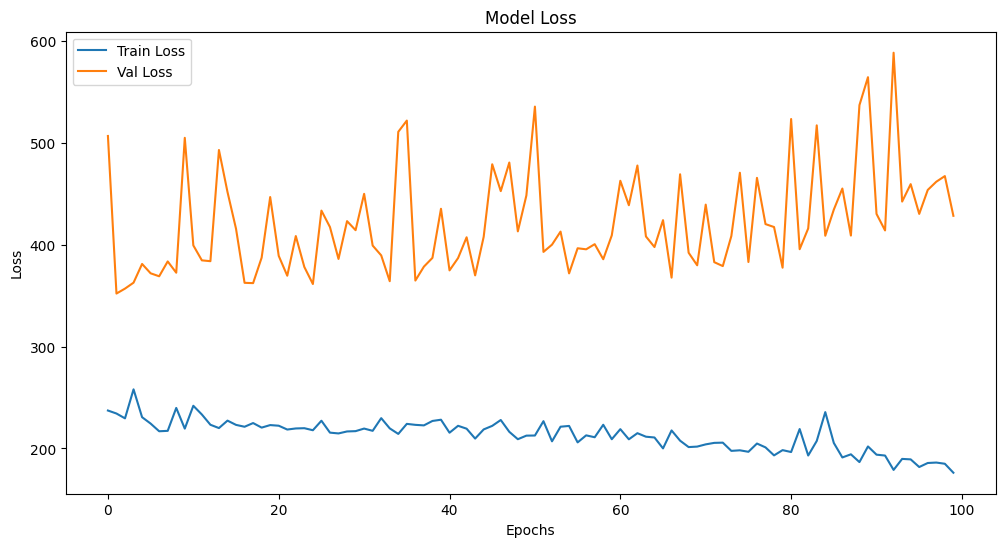

In [11]:
# Asegúrate de que tienes un objeto 'history' que retorna la función 'fit' con la historia del entrenamiento
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Gráfica las curvas de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Usando LSTM

In [12]:
# Cargando el conjunto de datos
data = pd.read_csv('data.csv')

# Haciendo unos cambios al formato.
data['Year'] = data['Month'].apply(lambda x: int(x.split('-')[0]))
data['Month'] = data['Month'].apply(lambda x: int(x.split('-')[1]))

# Dividiendo los datos en características (X) y etiquetas (y)
X = data[['Year', 'Month']]
y = data['Sunspots']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalando los datos para mejorar el rendimiento de la red neuronal
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Haciendo reshape para que los datos sean adecuados para la capa LSTM (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Creando la estructura de la red neuronal con LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(1, 2), return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida para la regresión
])

# Compilando
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenando el modelo
model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluando el modelo
loss = model.evaluate(X_test_lstm, y_test)
print("Pérdida en el conjunto de prueba:", loss)

Epoch 1/100
71/71 [==============================] - 3s 6ms/step - loss: 4528.3486 - val_loss: 4259.9526
Epoch 2/100
71/71 [==============================] - 0s 2ms/step - loss: 3198.4773 - val_loss: 1910.8590
Epoch 3/100
71/71 [==============================] - 0s 2ms/step - loss: 1844.0391 - val_loss: 1821.9081
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 1800.5170 - val_loss: 1797.1444
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 1784.3674 - val_loss: 1782.3304
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 1776.5428 - val_loss: 1774.2483
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 1767.2942 - val_loss: 1769.2028
Epoch 8/100
71/71 [==============================] - 0s 2ms/step - loss: 1762.6256 - val_loss: 1784.2819
Epoch 9/100
71/71 [==============================] - 0s 2ms/step - loss: 1763.2393 - val_loss: 1766.0807
Epoch 10/100
71/71 [==============================] - 0

71/71 [==============================] - 0s 2ms/step - loss: 1694.0430 - val_loss: 1791.7026
Epoch 79/100
71/71 [==============================] - 0s 2ms/step - loss: 1702.7002 - val_loss: 1754.4491
Epoch 80/100
71/71 [==============================] - 0s 2ms/step - loss: 1699.8107 - val_loss: 1737.0048
Epoch 81/100
71/71 [==============================] - 0s 2ms/step - loss: 1697.5076 - val_loss: 1741.5076
Epoch 82/100
71/71 [==============================] - 0s 2ms/step - loss: 1701.3729 - val_loss: 1758.2241
Epoch 83/100
71/71 [==============================] - 0s 2ms/step - loss: 1694.1008 - val_loss: 1758.4069
Epoch 84/100
71/71 [==============================] - 0s 2ms/step - loss: 1690.0554 - val_loss: 1780.1088
Epoch 85/100
71/71 [==============================] - 0s 2ms/step - loss: 1693.4447 - val_loss: 1741.3652
Epoch 86/100
71/71 [==============================] - 0s 2ms/step - loss: 1688.6090 - val_loss: 1737.2250
Epoch 87/100
71/71 [==============================] - 0s 2m

#### Predicciones del modelo

In [13]:
# Realizando predicciones
predictions3 = model.predict(X_test_lstm)
print("Predicciones: ", predictions3)

18/18 [==============================] - 0s 910us/step
Predicciones:  [[50.589146]
 [59.392403]
 [37.241665]
 [50.962204]
 [88.18908 ]
 [52.606697]
 [40.77292 ]
 [97.1137  ]
 [54.18332 ]
 [38.030632]
 [51.576797]
 [42.056194]
 [47.423122]
 [48.763756]
 [37.749973]
 [53.75283 ]
 [89.372375]
 [63.44236 ]
 [54.257915]
 [48.67633 ]
 [79.87066 ]
 [43.340874]
 [50.736137]
 [41.6544  ]
 [36.54435 ]
 [51.698242]
 [34.322155]
 [53.587975]
 [54.38565 ]
 [37.5199  ]
 [52.59631 ]
 [42.527706]
 [51.65253 ]
 [38.69468 ]
 [43.64235 ]
 [36.866028]
 [41.082016]
 [50.735023]
 [51.398132]
 [42.263424]
 [52.87551 ]
 [55.102325]
 [77.226494]
 [59.278103]
 [46.054096]
 [54.467987]
 [50.232155]
 [30.470098]
 [36.723457]
 [54.080597]
 [45.778564]
 [44.607975]
 [52.029625]
 [54.10332 ]
 [84.23853 ]
 [32.062504]
 [36.842247]
 [41.400696]
 [96.13907 ]
 [65.300415]
 [53.52621 ]
 [51.05612 ]
 [59.914246]
 [46.279922]
 [88.660805]
 [51.72825 ]
 [91.56905 ]
 [68.14047 ]
 [31.599314]
 [47.72397 ]
 [45.618828]
 [38.79

In [14]:
# Calcula el MSE
mse = mean_squared_error(y_test, predictions3)
print(f"MSE: {mse}")

# Calcula el RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Calcula el MAE
mae = mean_absolute_error(y_test, predictions3)
print(f"MAE: {mae}")

MSE: 1732.226342874984
RMSE: 41.62002334063478
MAE: 33.5877518511833


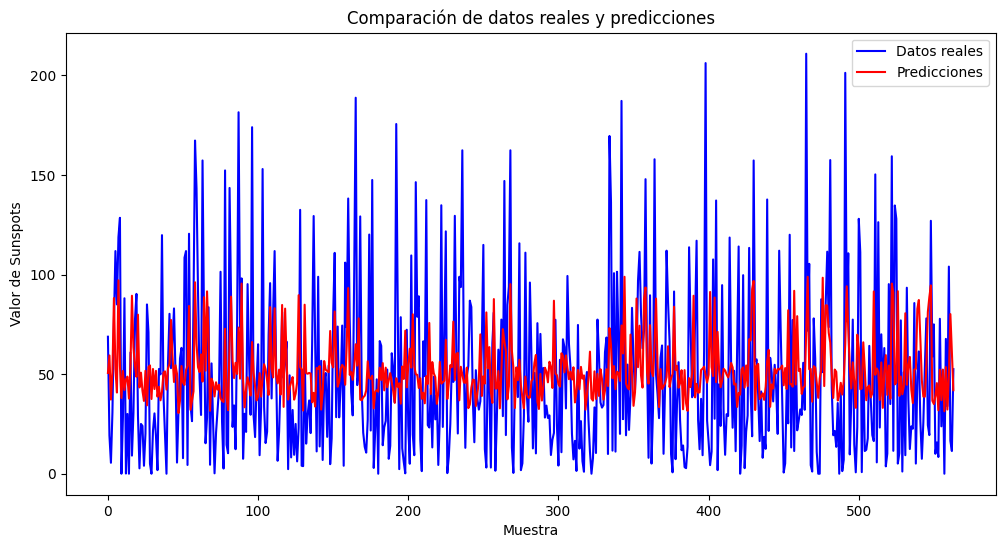

In [15]:
plt.figure(figsize=(12, 6))

# Datos reales
plt.plot(y_test.reset_index(drop=True), label="Datos reales", color="blue")

# Predicciones del modelo
plt.plot(predictions3.flatten(), label="Predicciones", color="red")

plt.title("Comparación de datos reales y predicciones")
plt.xlabel("Muestra")
plt.ylabel("Valor de Sunspots")
plt.legend()
plt.show()

Epoch 1/100
71/71 [==============================] - 0s 2ms/step - loss: 1663.7499 - val_loss: 1742.0560
Epoch 2/100
71/71 [==============================] - 0s 2ms/step - loss: 1668.1136 - val_loss: 1740.9657
Epoch 3/100
71/71 [==============================] - 0s 2ms/step - loss: 1665.5227 - val_loss: 1752.5935
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 1668.7518 - val_loss: 1731.4093
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 1657.9128 - val_loss: 1741.8541
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 1668.1021 - val_loss: 1734.5715
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 1659.8586 - val_loss: 1739.0195
Epoch 8/100
71/71 [==============================] - 0s 2ms/step - loss: 1662.0215 - val_loss: 1742.7340
Epoch 9/100
71/71 [==============================] - 0s 2ms/step - loss: 1661.3599 - val_loss: 1734.8335
Epoch 10/100
71/71 [==============================] - 0

71/71 [==============================] - 0s 2ms/step - loss: 1635.7246 - val_loss: 1742.0126
Epoch 79/100
71/71 [==============================] - 0s 2ms/step - loss: 1635.6232 - val_loss: 1722.1243
Epoch 80/100
71/71 [==============================] - 0s 2ms/step - loss: 1631.6904 - val_loss: 1718.3326
Epoch 81/100
71/71 [==============================] - 0s 2ms/step - loss: 1635.2534 - val_loss: 1735.4362
Epoch 82/100
71/71 [==============================] - 0s 2ms/step - loss: 1642.0247 - val_loss: 1747.7235
Epoch 83/100
71/71 [==============================] - 0s 2ms/step - loss: 1633.8248 - val_loss: 1746.3094
Epoch 84/100
71/71 [==============================] - 0s 2ms/step - loss: 1631.8939 - val_loss: 1727.7965
Epoch 85/100
71/71 [==============================] - 0s 2ms/step - loss: 1628.4719 - val_loss: 1741.1726
Epoch 86/100
71/71 [==============================] - 0s 2ms/step - loss: 1632.0817 - val_loss: 1721.9956
Epoch 87/100
71/71 [==============================] - 0s 2m

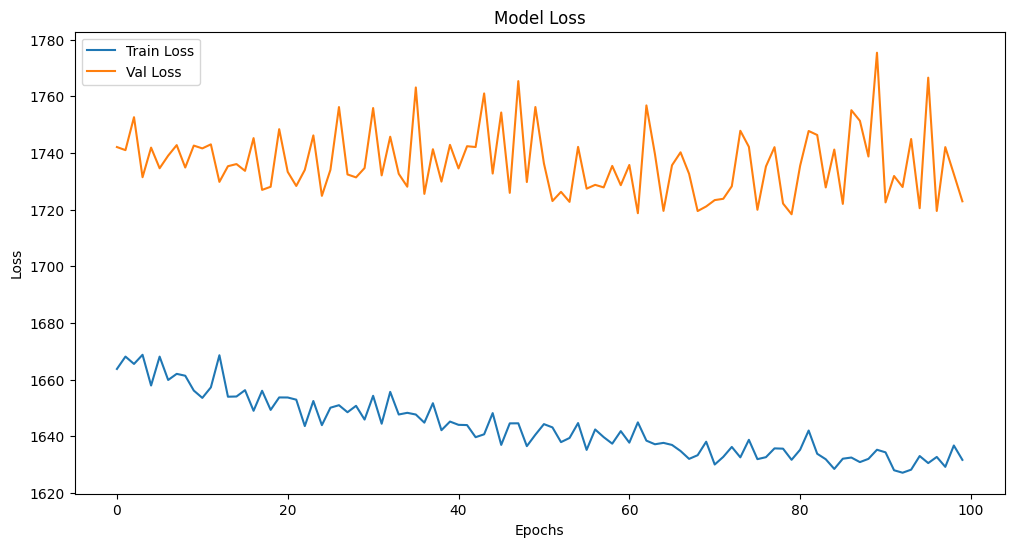

In [16]:
# Usa el objeto 'history' que devuelve la función 'fit' para guardar la historia de entrenamiento
history = model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_test_lstm, y_test))

# Gráfica las curvas de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()